### Choose a dataset to Visulaize
* Import needed libraries 
* Load your dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("insurance.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Univariate Visualization 
* Plot two Charts
* Provide each charts with at least two insights 

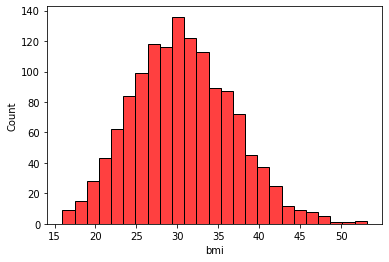

In [5]:
sns.histplot(data,x='bmi',color='red');

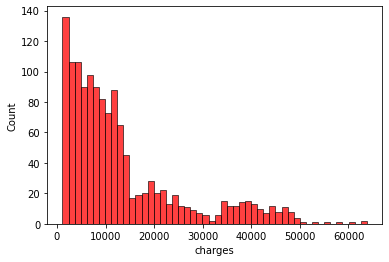

In [6]:
sns.histplot(data,x='charges',color='red',bins=50);

#### Write your insghts here

1- bmi column is normaly distributed.

2- there is no outliers

#### Write your insghts here

1- there is no outliers.

2- the distribution is skew to the right.

### Bivariate Visualization 
* Plot two Charts
* Provide each charts with at least two insights 

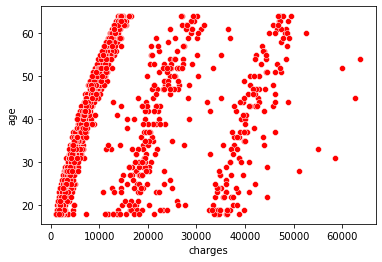

In [7]:
sns.scatterplot(data=data,x='charges',y='age',color='red');

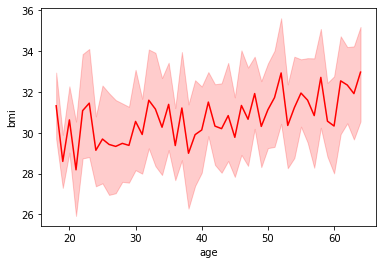

In [8]:
sns.lineplot(data=data,x='age',y='bmi',color='red');

#### Write your insghts here

1- the charges is increas as the age increas.

2- there is another factor that effect on charges.

#### Write your insghts here

1- there is no linear relationship between them.

2- the error is high so no relationship.

### Multivariate Visualization 
* Plot two Charts
* Provide each charts with at least two insights 

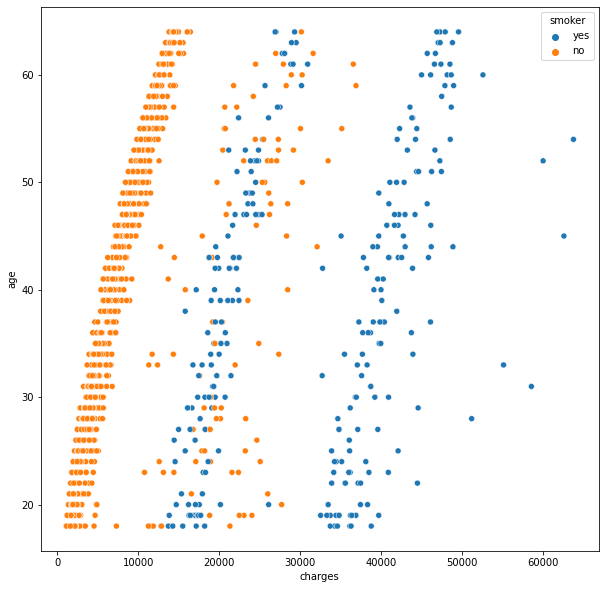

In [16]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data,x='charges',y='age',hue='smoker');

#### Write your insghts here

1- smoking people pay charges more then no smoking people.

2- the charge increas as the age increas if we remove the smoking people, so if we compare between 2 people and all of them not smoking then we can say the older one will pay more but if one of them is smoking then the smoker will pay more.

#### Write your insghts here